In [1]:
# Dependencies
import json
import requests
from citipy import citipy
from pprint import pprint
import random
import matplotlib.pyplot as plt
import pandas as pd

# WeatherMap API key
from config import wkey

In [2]:
# Define base url, create empty lists to hold random latitude and longitude values
# Create empty list to hold cities and country codes
url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
lon = []
city = []
country_code = []

In [3]:
# Generate random latitudes and longitudes, use citipy's nearest_city method to find nearest city to random coordinates
# Use .country_code method to find the country code for that city
# Append the city name and country code to lists
for i in range(50):
    lat = random.randint(-90,90)
    lon = random.randint(-180,180)
    city.append(citipy.nearest_city(lat, lon).city_name)
    country_code.append(citipy.nearest_city(lat, lon).country_code)

# unique_city removes duplicate cities
unique_city = list(set(city))

In [ ]:
# Define how to use lat and lon to get a city name
# city_name = citipy.nearest_city(lat, lon).city_name
# lat = random.randint(0,90)
# lon = random.randint(0,180)
# for i in range(500):
#     # check if previous city is the same as the current generated city
#     if city_name[i-1] != city_name[i]
#         city.append(citipy.nearest_city(lat, lon).city_name)
#     else:
# How do I not count duplicates?

In [ ]:
# Could I just redefine lat and lon in the else statement and re-do it?
# while len(city) < 500:
#     lat = random.randint(0,90)

In [ ]:
# citipy. (tab) gives all methods
#city. (tab) gives all attributes of city object

# Use random to calculate random numbers within range of possible lat/ lon values
# Use nearest_city function to generate a list of 500 random cities

In [ ]:
# Another way to do requests
# params = {'lat':'35',
#          'lon':'20',
#          'appid':'957ed23d9fff1c592db253cd70ddf414'}
# r = requests.get(url,params=params)
# r.url

In [5]:
# Example api call: api.openweathermap.org/data/2.5/weather?lat=35&lon=139
# query_url = url + "lat=" + lat + "&lon=" + lon + "appid=" + wkey
# query_url = url + "appid=" + wkey +"&lat=" + lat + "&lon=" + lon

# Concatenate variables to form query_urls list
query_urls = []
for i in range(50):
    query_urls.append(url + "appid=" + wkey + "&q=" + city[i] + "," + country_code[i])
print(query_urls)

['http://api.openweathermap.org/data/2.5/weather?appid=84ed2b5a2cac305fdd38f1d809477a0b&q=escarcega,mx', 'http://api.openweathermap.org/data/2.5/weather?appid=84ed2b5a2cac305fdd38f1d809477a0b&q=cap-aux-meules,ca', 'http://api.openweathermap.org/data/2.5/weather?appid=84ed2b5a2cac305fdd38f1d809477a0b&q=paamiut,gl', 'http://api.openweathermap.org/data/2.5/weather?appid=84ed2b5a2cac305fdd38f1d809477a0b&q=albany,au', 'http://api.openweathermap.org/data/2.5/weather?appid=84ed2b5a2cac305fdd38f1d809477a0b&q=illoqqortoormiut,gl', 'http://api.openweathermap.org/data/2.5/weather?appid=84ed2b5a2cac305fdd38f1d809477a0b&q=diplo,pk', 'http://api.openweathermap.org/data/2.5/weather?appid=84ed2b5a2cac305fdd38f1d809477a0b&q=kununurra,au', 'http://api.openweathermap.org/data/2.5/weather?appid=84ed2b5a2cac305fdd38f1d809477a0b&q=umm durman,sd', 'http://api.openweathermap.org/data/2.5/weather?appid=84ed2b5a2cac305fdd38f1d809477a0b&q=mataura,pf', 'http://api.openweathermap.org/data/2.5/weather?appid=84ed2b5

In [6]:
# Make an API call for each query url, append resultant json files to weather_json list
weather_json = []
for one_url in query_urls:
    weather_response = requests.get(one_url)
    weather_json.append(weather_response.json())

In [7]:
weather_json

[{'base': 'stations',
  'clouds': {'all': 64},
  'cod': 200,
  'coord': {'lat': 18.61, 'lon': -90.75},
  'dt': 1522479339,
  'id': 3527795,
  'main': {'grnd_level': 1019,
   'humidity': 84,
   'pressure': 1019,
   'sea_level': 1029.33,
   'temp': 297.301,
   'temp_max': 297.301,
   'temp_min': 297.301},
  'name': 'Escarcega',
  'sys': {'country': 'MX',
   'message': 0.0034,
   'sunrise': 1522497459,
   'sunset': 1522541795},
  'weather': [{'description': 'broken clouds',
    'icon': '04n',
    'id': 803,
    'main': 'Clouds'}],
  'wind': {'deg': 348.001, 'speed': 1.08}},
 {'base': 'stations',
  'clouds': {'all': 76},
  'cod': 200,
  'coord': {'lat': 47.38, 'lon': -61.86},
  'dt': 1522479339,
  'id': 5915327,
  'main': {'grnd_level': 1014.86,
   'humidity': 92,
   'pressure': 1014.86,
   'sea_level': 1014.94,
   'temp': 273.301,
   'temp_max': 273.301,
   'temp_min': 273.301},
  'name': 'Cap-aux-Meules',
  'rain': {'3h': 0.415},
  'sys': {'country': 'CA',
   'message': 0.003,
   'sunris

In [8]:
# Empty lists to hold all values of interest
new_city = []
latitudes = []
temps = []
humidity = []
cloudiness = []
windspeed = []

# Loop through each json file and gather data into lists
# new_city is gathered from the json file, fixing the error if OpenWeatherMap doesn't have data on unique_city
for i in range(50):
    try:
        new_city.append(weather_json[i]['name'])
        latitudes.append(weather_json[i]['coord']['lat'])
        temps.append(weather_json[i]['main']['temp'])
        humidity.append(weather_json[i]['main']['humidity'])
        cloudiness.append(weather_json[i]['clouds']['all'])
        windspeed.append(weather_json[i]['wind']['speed'])
    except:
        continue
# print(new_city)
# print(latitudes)
# print(temps)
# print(humidity)
# print(cloudiness)
# print(windspeed)

print("City:", len(new_city), "Latitude:", len(latitudes), "Temps:", len(temps), "Humidity:", len(humidity), "Cloudiness:", 
     len(cloudiness), "Windspeed: ", len(windspeed))

['Escarcega', 'Cap-aux-Meules', 'Paamiut', 'Albany', 'Diplo', 'Kununurra', 'Del Rio', 'Berbera', 'Rikitea', 'Tabuk', 'Slave Lake', 'Bambous Virieux', 'Hobart', 'Atuona', 'Grand Gaube', 'Opuwo', 'Kangaatsiaq', 'Altamira', 'Hobart', 'Tuktoyaktuk', 'Ushuaia', 'Busselton', 'Yuyao', 'Coos Bay', 'Cidreira', 'Vao', 'Peniche', 'Ushuaia', 'Hermanus', 'Grindavik', 'Kodiak', 'Kodiak', 'Jamestown', 'Bethel', 'Port Alfred', 'Kapaa', 'Rzhaksa', 'Punta Arenas', 'Jaguarao', 'Rikitea', 'Pisco', 'Rawson', 'Longyearbyen', 'Hobart']
City: 44 Latitude: 44 Temps: 44 Humidity: 44 Cloudiness: 44 Windspeed:  44


In [9]:
# DataFrame with all data
# I can use DataFrame methods to ensure I don't have duplicate cities
# unique_city removes duplicates, but OpenWeatherMap doesn't have data on all unique cities so lists are still uneven

weather_df = pd.DataFrame({
    "City":new_city, 
    "Latitude":latitudes, 
    "Temperature":temps, 
    "Humidity":humidity, 
    "Cloudiness":cloudiness, 
    "Windspeed":windspeed
})
# weather_df
unique_weather_df = weather_df.drop_duplicates(["Latitude"])
unique_weather_df

,City,Cloudiness,Humidity,Latitude,Temperature,Windspeed
0,Escarcega,64,84,18.61,297.301,1.08
1,Cap-aux-Meules,76,92,47.38,273.301,5.93
2,Paamiut,76,89,61.99,273.201,4.33
3,Albany,64,73,-35.02,291.951,5.38
4,Diplo,0,26,24.47,308.801,6.73
5,Kununurra,75,66,-15.77,303.150,6.20
6,Del Rio,1,68,29.36,292.150,6.20
7,Berbera,0,69,10.44,299.501,1.28
8,Rikitea,80,100,-23.12,297.951,2.33
9,Tabuk,0,44,28.38,288.150,2.10


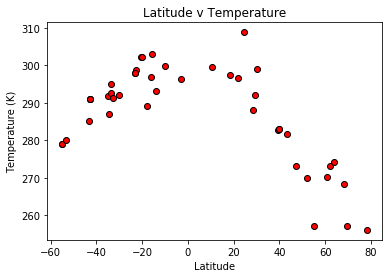

In [10]:
# Latitude vs Temperature
plt.title("Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.scatter(unique_weather_df["Latitude"], unique_weather_df["Temperature"], marker="o", facecolors="red", 
            edgecolors="black")

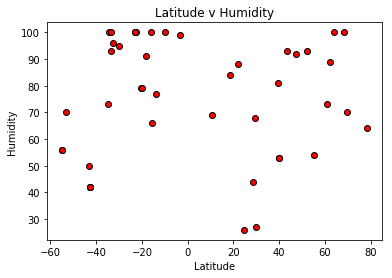

In [11]:
# Latitude vs Humidity
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(unique_weather_df["Latitude"], unique_weather_df["Humidity"], marker="o", facecolors="red", edgecolors="black")

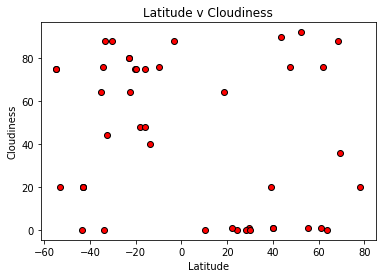

In [12]:
# Latitude vs Cloudiness
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(unique_weather_df["Latitude"], unique_weather_df["Cloudiness"], marker="o", facecolors="red", 
            edgecolors="black")

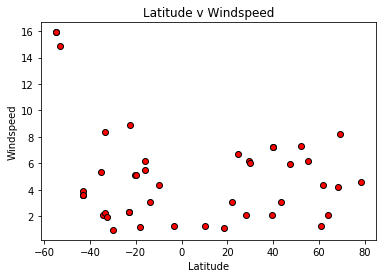

In [13]:
# Latitude vs Windspeed
plt.title("Latitude v Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.scatter(unique_weather_df["Latitude"], unique_weather_df["Windspeed"], marker="o", facecolors="red", edgecolors="black")